W tym zadaniu zajmiemy się ekstrakcją melowo-częstotliwościowych współczynników cepstralnych (MFCC).

MFCC to cechy bardzo często ekstrahowane z sygnałów akustycznych z zakresu słyszalnego, głównie sygnału mowy. Uzyskiwane są poprzez filtrację cepstrum (cepstrum - odwrotna transformata Fouriera z widma wyrażonego w skali logarytmicznej) bankiem filtrów trójkątnych. Filtry te są dobrane tak, by w (dużym) przybliżeniu modelować odpowiedź układu słuchowego człowieka na sygnał akustyczny. Rodzielczość częstotliwościowa słuchu jest wyższa dla niskich częstotliwości, a niższa dla wysokich, więc filtry melowe są węższe dla niskich częstotliwości i szersze dla wysokich.

Algorytm ekstrakcji MFCC jest w skórcie opisany np. tutaj: https://sound.eti.pg.gda.pl/student/amowy/AM_07_ASR.pdf (slajdy 8-11).

1. Wyświetl spektrum dowolnego sygnału z poprzedniego zadania (folder dane_testowe).

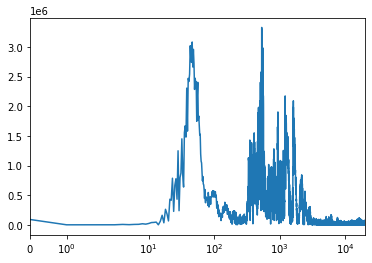

In [12]:
from scipy.io.wavfile import read as read_wav
from os import listdir
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
pliki = listdir('dane_testowe/')
ids_to_get = [1, 10, 95, 110, 121, 144, 676, 699, 888, 910, 1182, 1204, 1207, 1528, 1860, 1897, 1972, 2102, 2152, 2444]
pliki = ['dane_testowe/'+x for x in pliki if x.__contains__('phrase')]
ids_to_get.sort()
pliki.sort()
plikizId = []
while len(ids_to_get)>0:
    for i in pliki:
        if(i.__contains__(str(ids_to_get[0]))):
            plikizId.append(i)
            break
    ids_to_get.remove(ids_to_get[0])
sr, data = read_wav(plikizId[0])
spectrum = np.fft.fft(data)
plt.plot(abs(spectrum))
plt.xlim(0, 20000)
plt.xscale('symlog')
plt.show()



2. Wyznacz MFCC dla tego samego sygnału - poniżej fragment kodu, który możesz użyć.

In [13]:
import librosa

x, fs = librosa.load(plikizId[0])
mfcc_20_coeffs = librosa.feature.mfcc(x, sr=fs)
print(mfcc_20_coeffs.shape)
 #pierwszy wymiar - liczba współczynników MFCC, drugi - liczba ramek sygnału

(20, 88)


C:\Users\jakub\AppData\Local\Temp\ipykernel_11816\2358894817.py:4: FutureWarning: Pass y=[0.00058996 0.00120533 0.00134682 ... 0.00055961 0.00025699 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_20_coeffs = librosa.feature.mfcc(x, sr=fs)


Liczba współczynników jest domyślnie ustawiona na 20 i można ją zmienić podając do funkcji argument n_mfcc. Najmniejszą często używaną liczbą współczynników jest 13. 

In [14]:
mfcc_13_coeffs = librosa.feature.mfcc(x, sr=fs, n_mfcc=13)

C:\Users\jakub\AppData\Local\Temp\ipykernel_11816\789262949.py:1: FutureWarning: Pass y=[0.00058996 0.00120533 0.00134682 ... 0.00055961 0.00025699 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_13_coeffs = librosa.feature.mfcc(x, sr=fs, n_mfcc=13)


3. Wyświetl MFCC jako obraz (funkcja imshow()). Porównaj wygląd obu obrazów oraz ich wymiary.

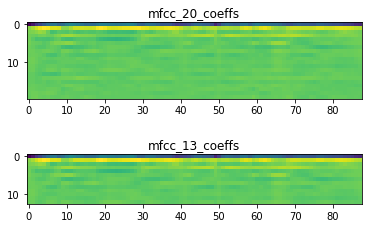

In [15]:
ax1 = plt.subplot(211)
ax1.set_title('mfcc_20_coeffs')
ax2 = plt.subplot(212)
ax2.set_title('mfcc_13_coeffs')
ax1.imshow(mfcc_20_coeffs)
ax2.imshow(mfcc_13_coeffs)

4. Wytrenuj klasyfikator analogicznie do zadania 1, ale tym razem na MFCC, a nie na spektrogramach (użyj części kodu z poprzedniego zadania). Pamiętaj o zachowaniu takiego samego podziału sygnałów na zbiory uczący i testowy (w poprzednim zadaniu trzeba było zapisać listę plików w obu zbiorach do plików - możesz ich użyć dla pewności lub zastosować taki sam random_state w funkcji train_test_split).

In [17]:

def testy():
    Phrases = []
    for i in plikizId:
        x, fs = librosa.load(i)
        data = librosa.feature.mfcc(x, sr=fs)
        a = data.flatten()
        a = a.transpose()
        Phrases.append(a)
    ids_to_get = [1, 10, 95, 110, 121, 144, 676, 699, 888, 910, 1182, 1204, 1207, 1528, 1860, 1897, 1972, 2102, 2152, 2444]
    IDs = [110, 144, 888, 910, 1204, 1897, 1972, 2102, 2152, 2444] 
    labels = []
    for i in ids_to_get:
        if(i in IDs):
            labels.append(1)
            continue
        labels.append(0)
    min_length = min(map(lambda x: x.shape[-1], Phrases))
    Phrases = np.stack([x[..., :min_length] for x in Phrases])
    X_train, X_test, Y_train, Y_test = train_test_split(Phrases, labels, test_size=0.2)
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, Y_train)
    return clf.predict(X_test), Y_test
dobrze = 0
zle = 0
ilosc = 20
for i in range(0, ilosc):
    p, t = testy()
    for j in range(0, 4):
        if p[j] == t[j]:
            dobrze=dobrze+1
            continue
        zle = zle+1
print('sukces: '+ str(dobrze/(dobrze+zle)))




C:\Users\jakub\AppData\Local\Temp\ipykernel_11816\1689294578.py:5: FutureWarning: Pass y=[0.00058996 0.00120533 0.00134682 ... 0.00055961 0.00025699 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(x, sr=fs)
C:\Users\jakub\AppData\Local\Temp\ipykernel_11816\1689294578.py:5: FutureWarning: Pass y=[-0.01685113 -0.02027931 -0.0155162  ... -0.49860445 -0.33200708
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(x, sr=fs)
C:\Users\jakub\AppData\Local\Temp\ipykernel_11816\1689294578.py:5: FutureWarning: Pass y=[0.02272365 0.02664142 0.02137595 ... 0.03510338 0.04038216 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(x, sr=fs)
C:\Users\jakub\AppData\Local\Temp\ipykernel_11816\1689294578.py:5: FutureWarning: Pass y=[ 0.006701

sukces: 0.475


C:\Users\jakub\AppData\Local\Temp\ipykernel_11816\1689294578.py:5: FutureWarning: Pass y=[ 1.3402435e-04  8.3646846e-05 -9.1208385e-05 ... -4.1254153e-04
 -1.9448090e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(x, sr=fs)


5. Wylicz metryki sukcesu i oceń, czy zmiana rodzaju użytych cech sygnału ma wpływ na wyniki.

In [ ]:
# W zasadzie nie można powiedzieć, że program rozpoznaje poprawnie frazy. W przypadku spektogramu wychodziło o wiele lepiej